In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data=pd.read_csv('creditcard.csv')
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
data_new=data.drop(columns=['Class','Time'])
data_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [4]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
from sklearn.preprocessing import normalize
data_scale=normalize(data_new)

8544210.0
8149792.033816942
7873490.393383201
7605973.321503474
7437190.825923664
7276616.153519756
7153961.844046783
6883552.39894718
6718313.530324164


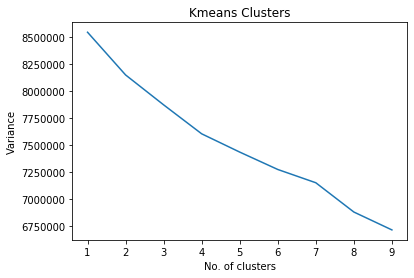

In [5]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=100)
    kmeans.fit(data_scale)
    wcss.append(kmeans.inertia_)
for j in wcss:
    print(j)
plt.figure()
plt.xlabel('No. of clusters')
plt.title('Kmeans Clusters')
plt.ylabel('Variance')
plt.plot(range(1,10),wcss)
plt.show()

In [7]:
#kmeans=KMeans(n_clusters=2,init='k-means++',random_state=100)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
y_means=kmeans.fit_predict(data_scale)

In [8]:
centroid=kmeans.cluster_centers_

In [9]:
centroid

array([[ 6.72273448e-03,  1.53384436e-02,  1.24671480e-02,
        -1.53623589e-03,  5.81404109e-03, -4.85976318e-03,
         4.60103192e-04,  2.90433073e-03, -9.41684055e-04,
        -3.52223778e-04, -9.61077814e-04, -1.29581357e-04,
         1.27756085e-03,  1.71353621e-03, -1.89471050e-04,
         2.17974744e-03, -2.56372285e-03, -3.07912577e-03,
         1.39788160e-03, -3.41705528e-03, -1.52426389e-03,
        -1.39854861e-03, -8.12514476e-05,  3.92901289e-04,
        -1.45471212e-03,  2.49881324e-04,  7.65232968e-04,
         3.94374218e-04,  9.58575294e-01],
       [ 7.35205594e-02,  1.33240502e-01, -3.32330960e-02,
         2.29454031e-02,  8.06139354e-02, -7.69637919e-02,
         3.37295330e-02, -5.86046053e-03,  2.87266868e-02,
        -3.47005252e-02,  2.70256164e-02,  3.61170365e-02,
        -1.33533907e-02, -4.36556676e-03,  4.04148963e-02,
         3.18591714e-02, -1.24633944e-02, -4.57267759e-03,
         1.29750958e-03, -1.14886255e-02, -1.67926646e-02,
        -3.08

In [10]:
y_means

array([0, 1, 0, ..., 0, 0, 0])

In [11]:
kmeans.labels_.astype(float)

array([0., 1., 0., ..., 0., 0., 0.])

In [12]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
data['Class_Pred']=kmeans.labels_.astype(float)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Class_Pred
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0.0


In [14]:
data.Class_Pred.value_counts()

0.0    226792
1.0     58015
Name: Class_Pred, dtype: int64

In [15]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Class_Pred
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0.0


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(data['Class_Pred'],data['Class']))

0.7963498088179013


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(data['Class_Pred'],data['Class']))

[[226553    239]
 [ 57762    253]]


In [21]:
X=data.drop(columns=['Class','Class_Pred','Time'])
Y=data['Class']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=100,test_size=0.2)
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)


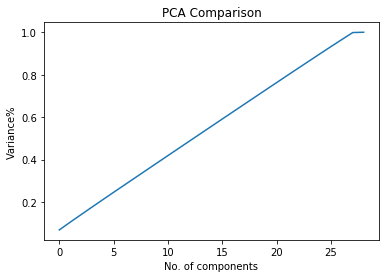

In [40]:
from sklearn.decomposition import PCA
pca=PCA().fit(scaled_X_train)
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure()
plt.xlabel('No. of components')
plt.ylabel('Variance%')
plt.title('PCA Comparison')
plt.plot(list(range(0,29)),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06826976, 0.10464904, 0.14015414, 0.17551418, 0.21072503,
       0.24561107, 0.28030612, 0.31498071, 0.34962053, 0.3842551 ,
       0.41880358, 0.45334245, 0.48785819, 0.52233531, 0.55678122,
       0.59121304, 0.62561016, 0.65995407, 0.69427683, 0.72858798,
       0.76286654, 0.79711892, 0.8311434 , 0.86505539, 0.8989398 ,
       0.93266466, 0.96588666, 0.99858696, 1.        ])

In [43]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
dataset_smote, y_train_smote = oversample.fit_sample(scaled_X_train, Y_train)

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(200,oob_score=True)
model.fit(dataset_smote,y_train_smote)
model.oob_score_

0.999760737238033

In [45]:
Y_pred=model.predict(scaled_X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
confusion_matrix(Y_test,Y_pred)

array([[48769,    17],
       [   12,  8164]], dtype=int64)

In [46]:
print(accuracy_score(Y_test,Y_pred))
print(recall_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred))
print(f1_score(Y_test,Y_pred))

0.9994908886626171
0.9985322896281801
0.9979220144236646
0.9982270587516049


In [48]:
from sklearn.svm import SVC
from sklearn import svm
model_rbf=svm.SVC(kernel='rbf',C=1,gamma=0.001)
model_rbf.fit(dataset_smote,y_train_smote)
Y_pred=model_rbf.predict(scaled_X_test)
print(accuracy_score(Y_pred,Y_test))

0.9977002212000983


In [22]:
from sklearn.svm import SVC
from sklearn import svm
model_rbf=svm.SVC(kernel='rbf',C=1,gamma=0.001)
model_rbf.fit(scaled_X_train,Y_train)
Y_pred=model_rbf.predict(scaled_X_test)
print(accuracy_score(Y_pred,Y_test))

0.9990519995786665
